<a href="https://colab.research.google.com/gist/brwa88/dd742d62f78aff9c6e4ed8bf5e7cd81f/untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import numpy as np

In [2]:
   #load our data  
   url = "https://raw.githubusercontent.com/brwa88/Kidney-Project/master/kidney_disease1.csv"
columns = ["age","bp","sg","al","su","rbc","pc","pcc","ba","bgr",
                     "bu","sc","sod","pot","hemo","pcv","wc","rc","htn","dm",
                     "cad","appet","pe","ane","classification"]

df = pandas.read_csv(url, names=columns)


df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,-1,normal,notpresent,notpresent,121,36.0,1.2,-1.0,-1.0,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,-1,normal,notpresent,notpresent,-1,18.0,0.8,-1.0,-1.0,11.3,38,6000,-1.0,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53.0,1.8,-1.0,-1.0,9.6,31,7500,-1.0,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26.0,1.4,-1.0,-1.0,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [120]:
df.shape

(400, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age               400 non-null int64
bp                400 non-null int64
sg                400 non-null float64
al                400 non-null int64
su                400 non-null int64
rbc               400 non-null object
pc                400 non-null object
pcc               400 non-null object
ba                400 non-null object
bgr               400 non-null int64
bu                400 non-null float64
sc                400 non-null float64
sod               400 non-null float64
pot               400 non-null float64
hemo              400 non-null float64
pcv               400 non-null int64
wc                400 non-null int64
rc                400 non-null float64
htn               400 non-null object
dm                399 non-null object
cad               400 non-null object
appet             400 non-null object
pe                400 non-null object
ane               400

Text(0.5, 1, 'Number of Missing Values')

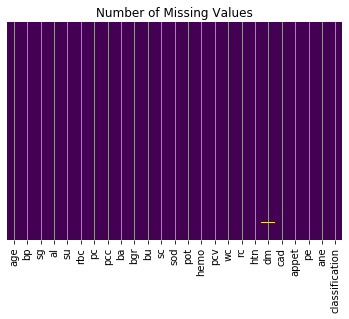

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.grid()
plt.title("Number of Missing Values")

In [0]:
#creating a list of our coloms

columns_to_retain = ["age","bp","sg", "al","su","bgr","bu", "sc","sod", "hemo",
                         "pcv", "wc", "rc", "htn","dm","cad","pe","ane", "classification"]

#columns to use and drop the columns that are not using
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
       


In [11]:
# drop the rows with na or missing values
df = df.dropna(axis=0)

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])
        df.head()

df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,hemo,pcv,wc,rc,htn,dm,cad,pe,ane,classification
0,41,4,1.020,2,1,49,36.0,1.2,-1.0,15.4,32,36,5.2,2,5,2,1,1,0
1,6,1,1.020,5,1,0,18.0,0.8,-1.0,11.3,26,20,-1.0,1,4,2,1,1,0
2,55,4,1.010,3,4,141,53.0,1.8,-1.0,9.6,19,34,-1.0,1,5,2,1,2,0
3,41,3,1.005,5,1,45,56.0,3.8,111.0,11.2,20,26,3.9,2,4,2,2,2,0
4,44,4,1.010,3,1,34,26.0,1.4,-1.0,11.6,23,32,4.6,1,4,2,1,1,0


In [12]:
df.shape

(399, 19)

In [0]:
array = df.values
X = array[:,0:18]
Y = array[:,18]

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))


In [0]:
#split our data
X = df.drop(["classification"], axis=1)
y = df["classification"]

In [0]:
#Scaling our data
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [20]:
# evaluate each model in turn Mean accuracy  & standard deviation accuracy
results = []
names = []
scoring = 'accuracy'

for name, model in models:
	kfold = model_selection.KFold(n_splits=2, random_state=None)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)

	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 
	print(msg)



LR: 0.535616 (0.289384)
LDA: 0.500590 (0.264410)
KNC: 0.508116 (0.261884)
DTC: 0.573116 (0.326884)
GNB: 0.603116 (0.356884)


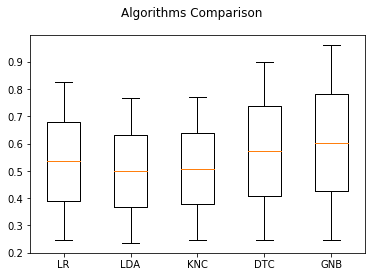

In [21]:
fig = plt.figure()
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()